# Data Inspection notebook for HECKTOR dataset

In [1]:
import os, glob
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk

## Import Utility Functions

Functions imported: read_image, display_slices, display_overlay_slices

In [2]:
from notebook_utils import *

## Dataset statistics

In [ ]:
train_data_dir = "../data/HECKTOR/hecktor_train/hecktor_nii"

patient_ids = sorted(os.listdir(train_data_dir))

### 1 Voxel spacing and array sizes

In [6]:
ct_xy_spacing_counts = {}
ct_z_spacing_counts = {}
ct_xy_size_counts = {}
ct_n_slices_counts = {}

pet_xy_spacing_counts = {}
pet_z_spacing_counts = {}
pet_xy_size_counts = {}
pet_n_slices_counts = {}

for p_id in tqdm(patient_ids):
    
    # For CT --
    ct_img_path = f"{train_data_dir}/{p_id}/{p_id}_ct.nii.gz"
    ct_sitk = read_image(ct_img_path, print_meta=False, print_stats=False)
    
    spacing = ct_sitk.GetSpacing() # Spacing: (W,H,D)
    if round(spacing[0], 2) not in ct_xy_spacing_counts.keys():
        ct_xy_spacing_counts[round(spacing[0], 2)] = 1
    else:
        ct_xy_spacing_counts[round(spacing[0], 2)] += 1
    
    size = ct_sitk.GetSize() # Size = (W,H,D)
    if size[0] not in ct_xy_size_counts.keys():
        ct_xy_spacing_counts[size[0]] = 1
    else:
        ct_xy_spacing_counts[size[0]] += 1

    
    # For PET --
    pet_img_path = f"{train_data_dir}/{p_id}/{p_id}_pt.nii.gz"
    pet_sitk = read_image(pet_img_path, print_meta=False, print_stats=False)
    
    spacing = pet_sitk.GetSpacing() # Spacing: (W,H,D)
    if round(spacing[0], 2) not in pet_xy_spacing_counts.keys():
        pet_xy_spacing_counts[round(spacing[0], 2)] = 1
    else:
        pet_xy_spacing_counts[round(spacing[0], 2)] += 1
    
    size = pet_sitk.GetSize() # Size = (W,H,D)
    if size[0] not in pet_xy_size_counts.keys():
        pet_xy_spacing_counts[size[0]] = 1
    else:
        pet_xy_spacing_counts[size[0]] += 1
    
print(ct_xy_spacing_counts)
print(ct_z_spacing_counts)
print(ct_xy_size_counts)
print(ct_n_slices_counts)

print(pet_xy_spacing_counts)
print(pet_z_spacing_counts)
print(pet_xy_size_counts)
print(pet_n_slices_counts)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.270020008087158)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(512, 512, 91)



(0.9765620231628418, 0.9765620231628418, 3.269989013671875)
(5

SystemError: <built-in function ReadImage> returned a result with an error set

### 2 Intensity distribution

## Read Images


In [7]:
# Original CT image
image_path = "../data/HECKTOR/hecktor_train/hecktor_nii/CHGJ007/CHGJ007_ct.nii.gz"
print("Loading original CT ...")
sitk_image_CT = read_image(image_path)

# Original PET Image
image_path = "../data/HECKTOR/hecktor_train/hecktor_nii/CHGJ007/CHGJ007_pt.nii.gz"
print("Loading original PT ...")
sitk_image_PET = read_image(image_path)

# Original GTV mask
gtv_mask_path = "../data/HECKTOR/hecktor_train/hecktor_nii/CHGJ007/CHGJ007_ct_gtvt.nii.gz"
print("Loading original GTV mask ...")
sitk_image_SEG = read_image(gtv_mask_path)


# Resampled CT Image
image_path = "../data/HECKTOR/hecktor_train/resampled/CHGJ007_ct.nii.gz"
print("Loading resampled PT ...")
resampled_image_CT = read_image(image_path)


# Original PET Image
image_path = "../data/HECKTOR/hecktor_train/resampled/CHGJ007_pt.nii.gz"
print("Loading resampled PT ...")
resampled_image_PET = read_image(image_path)

# Original PET Image
image_path = "../data/HECKTOR/hecktor_train/resampled/CHGJ007_ct_gtvt.nii.gz"
print("Loading resampled GTV mask ..")
resampled_image_SEG = read_image(image_path)


Loading original CT ...
Loaded image: CHGJ007_ct.nii.gz
Patient ID: CHGJ007
Modality: CT
Image size: (512, 512, 91)
Pixel spacing (mm): (0.9765620231628418, 0.9765620231628418, 3.269989013671875)
Physical size (mm): [499.999755859375, 499.999755859375, 297.5690002441406]


Loading original PT ...
Loaded image: CHGJ007_pt.nii.gz
Patient ID: CHGJ007
Modality: PT
Image size: (128, 128, 91)
Pixel spacing (mm): (3.515625, 3.515625, 3.269989013671875)
Physical size (mm): [450.0, 450.0, 297.5690002441406]


Loading original GTV mask ...
Loaded image: CHGJ007_ct_gtvt.nii.gz
Patient ID: CHGJ007
Modality: Binary GTV mask
Image size: (512, 512, 91)
Pixel spacing (mm): (0.9765620231628418, 0.9765620231628418, 3.269989013671875)
Physical size (mm): [499.999755859375, 499.999755859375, 297.5690002441406]


Loading resampled PT ...
Loaded image: CHGJ007_ct.nii.gz
Patient ID: CHGJ007
Modality: CT
Image size: (141, 141, 48)
Pixel spacing (mm): (1.0, 1.0, 3.0)
Physical size (mm): [141.0, 141.0, 144.0]



### Display original CT and PET

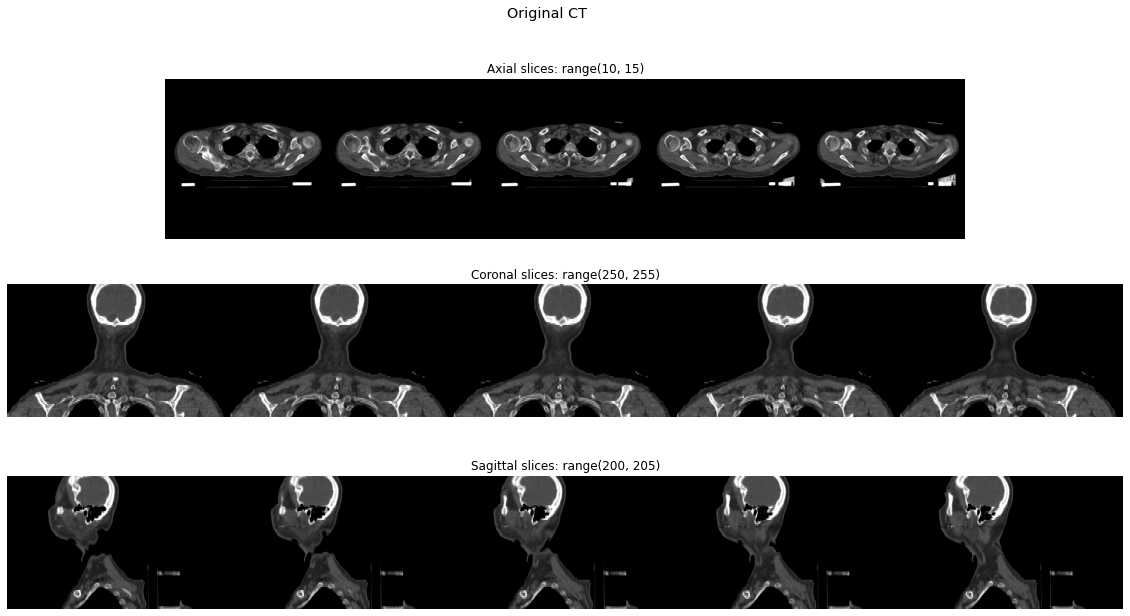

In [8]:
display_image(sitk_image_CT, 
             sagittal_idxs=range(200,205),
             coronal_idxs=range(250,255),
             axial_idxs=range(10,15),
             window_level = 200, window_width = 800,
             title="Original CT")

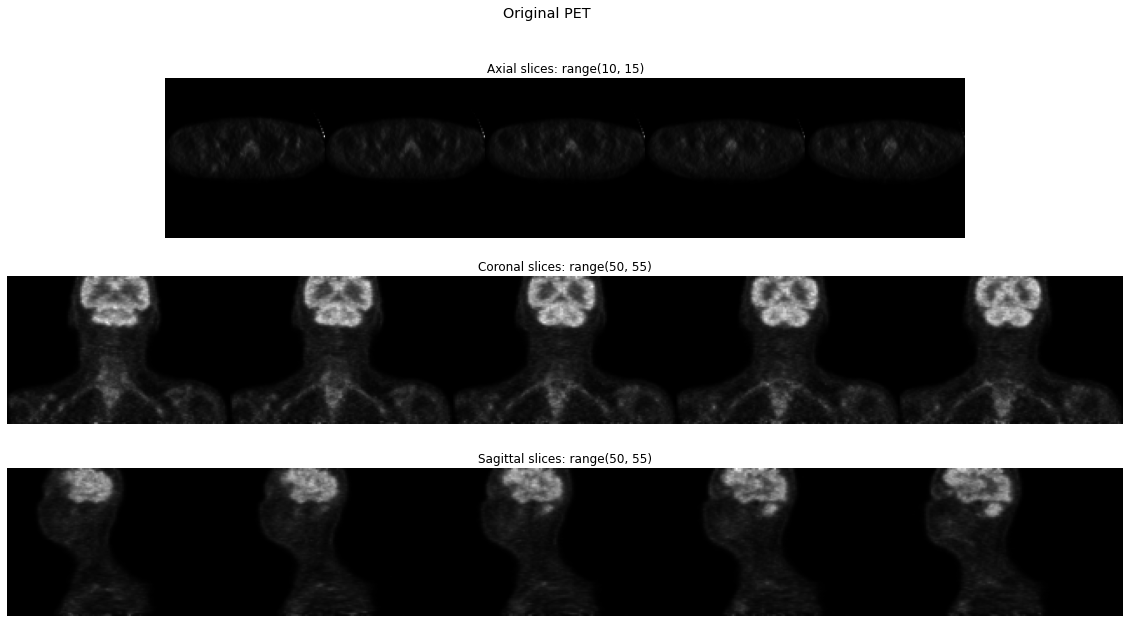

In [9]:
display_image(sitk_image_PET, 
             sagittal_idxs=range(50,55),
             coronal_idxs=range(50,55),
             axial_idxs=range(10,15),
             title="Original PET")

### Display resampled CT and PET

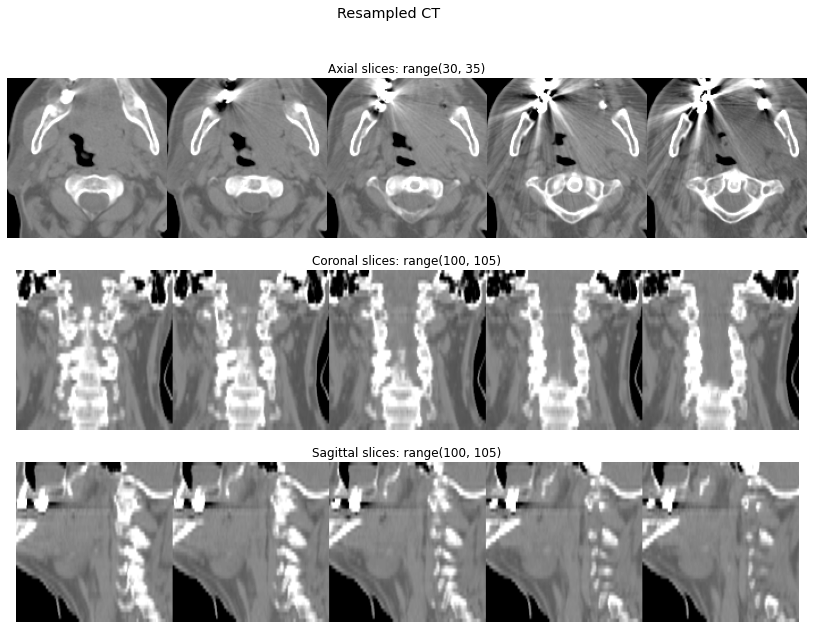

In [10]:
display_image(resampled_image_CT, 
             sagittal_idxs=range(100,105),
             coronal_idxs=range(100,105),
             axial_idxs=range(30,35),
             window_level = 20, window_width = 800,
             title="Resampled CT")

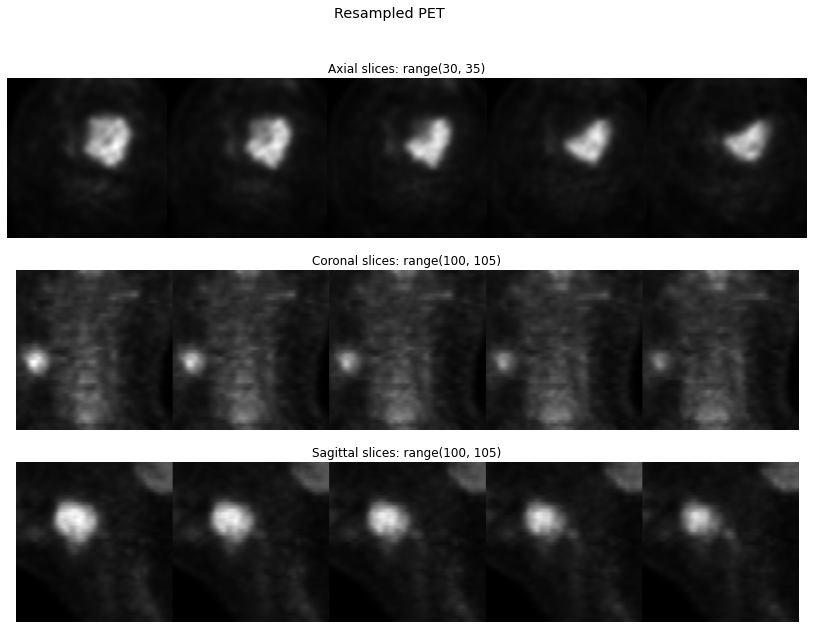

In [11]:
display_image(resampled_image_PET, 
             sagittal_idxs=range(100,105),
             coronal_idxs=range(100,105),
             axial_idxs=range(30,35),
             title="Resampled PET")

## PET-CT Fusion with Segmentation Overlay

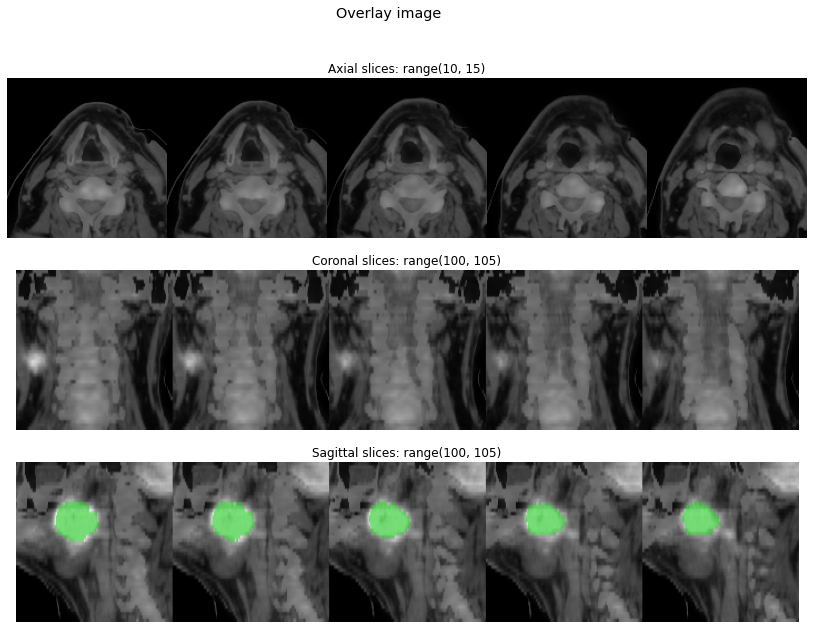

In [14]:
display_overlay_image(resampled_image_CT, resampled_image_PET, resampled_image_SEG, 
                       sagittal_idxs=range(100,105),
                       coronal_idxs=range(100,105),
                       axial_idxs=range(10,15),
                       gtv_opacity=0.5, pet_ct_alpha=0.3,
                       ct_window_level = 0, ct_window_width = 200,
                       pet_window_level = 5, pet_window_width = 10,
                       title="Overlay image")